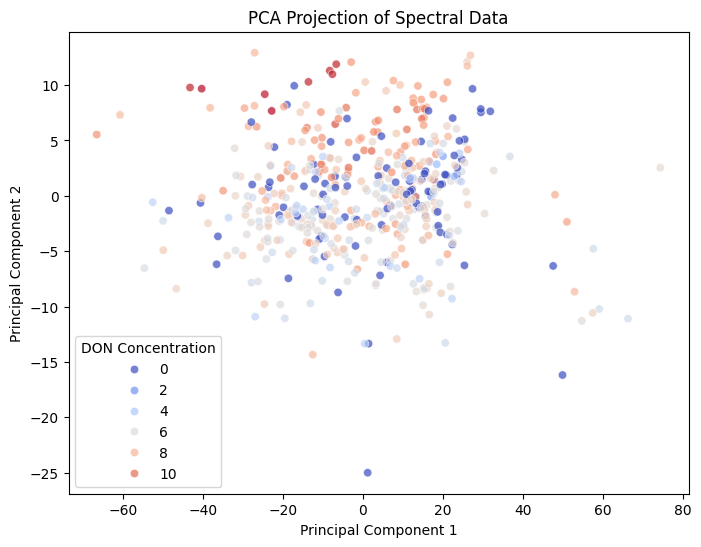

Mean Absolute Error (MAE): 2.3378
Root Mean Squared Error (RMSE): 3.0542
R^2 Score: -0.1490


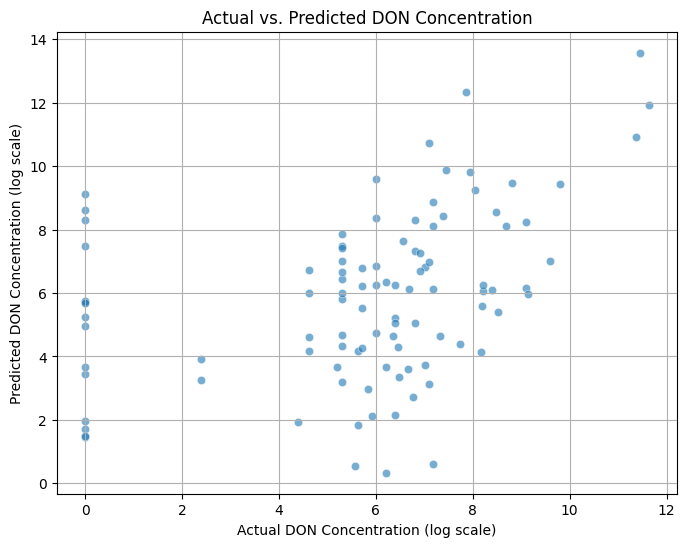

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("TASK-ML-INTERN.csv")

# Drop the identifier column
df.drop(columns=["hsi_id"], inplace=True)

# Check for missing values
assert df.isnull().sum().sum() == 0, "Dataset contains missing values!"

# Log transform the target variable to reduce skewness
df["vomitoxin_ppb"] = np.log1p(df["vomitoxin_ppb"])

# Normalize spectral data
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])  # All except the target
y = df["vomitoxin_ppb"].values

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.title("PCA Projection of Spectral Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="DON Concentration")
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual DON Concentration (log scale)")
plt.ylabel("Predicted DON Concentration (log scale)")
plt.title("Actual vs. Predicted DON Concentration")
plt.grid()
plt.show()
